### (E1)rock_scissor_paper

### 1. 데이터 준비  Preparing your data

직접 가위, 바위, 보를 100장씩 찍은 사진을 준비합시다.   
Let's take photos of each rock, scissor, paper yourself.

저 또한 어느 세월에 찍고 있나 했지만, 역시 구글은 다 준비를 해놨습니다.  
I also had worried before taking the pictures but Google prepared everything.  
https://teachablemachine.withgoogle.com/
에 들어가서 여러 각도, 여러 크기로 연속으로 사진을 찍기 바랍니다.  
After following the URL, please take continuous pictures of different angles and sizes.  

이미지를 저장하고 속성에 들어가서 크기를 확인하면 224X224 픽셀인 것을 알 수 있습니다.  
If you save the images and enter the property to see its size, you can see that it is 224X224 pixels.  
이 이미지를 28X28 픽셀로 resize해서 딥러닝이 가볍게 돌아갈 수 있도록 해줍시다.  
For doing deep learning lightly, you have to resize the images into 28X28 pixels.  
이때 PIL 라이브러리를 이용합니다.  
We're going to use the PIL library.
+ Python에서 이미지 처리를 할 때 사용하는 라이브러리 중 하나입니다. 
+ That is one of the libraries that Python uses to process images.  

또, os 와 glob 모듈을 사용할 것입니다. 모듈은 함수나 변수 또는 클래스를 모아 놓은 파일입니다.  
We're going to use os and glob modules too. The module is the pile that gathered variables or classes.  
우리는 파이썬이 이미 모아둔 파일을 이용하기만 하면 됩니다.  
We can just take advantage of the pile that was gathered by Python.

+ os 모듈은 Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해줍니다. 예를 들어, 파이썬을 이용해 파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 구하고자 할 때 os 모듈을 사용하면 됩니다.
+ The os modules are abbreviated to Operating System, allowing Python to perform many of the functions provided by the operating system. For example, if you want to use Python to copy files, create directories, and get a list of files within a specific directory, you can use the os module.  

+ glob 모듈은 윈도우의 dir 명령어나 리눅스의 ls 명령어와 유사한 기능을 제공합니다. glob() 함수는 경로에 대응되는 모든 파일 및 디렉터리의 리스트를 반환합니다.
+ The glob module provides functionality similar to the dir command in Windows or ls command in Linux. The glob() function returns a list of all files and directories corresponding to the path.

In [139]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import os, glob #easy to use, thank you Python!

# size 변경하기
# Let's change size of the images

# 사진이 저장된 폴더(디렉토리)에 있는 jpg 파일들을 28x28 사이즈로 바꾸어 저장합니다.
# Read all jpg files under the directory where the scissor image is stored and save each piles in 28x28 size.

# scissor
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor" # resize할 사진이 저장된 경로
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")
target_size=(28,28)
for img in images: # 반복문으로 모든 이미지에 대해서 아래와 같은 일을 수행
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
# 바위 와 보에도 똑같이 적용합니다.
# Do same at rock and paper.

#rock
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
# paper
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper


### 2. 딥러닝 네트워크 설계
다음 코드는 텐서플로우 케라스의 여러 방법 중 Sequential API를 이용한 것입니다.  
Following codes is Sequential API of TensorFlow keras's method.  
CS231n 수업에서 접할 수 있는 LeNet을 설계한 예입니다.  
This is an example of the design of LeNet that can be see at class CS231n.  
간단해 보이지만 가위, 바위, 보 분류기를 구현하는 데는 충분합니다.  
It looks very simple but it can clssify rock, scissor and paper enough.

In [140]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(60, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(60, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 26, 26, 30)        840       
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 11, 11, 60)        16260     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 5, 5, 60)          0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 1500)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 60)                90060     
_________________________________________________________________
dense_93 (Dense)             (None, 3)               

### 3. 라벨링 Labeling
사이즈를 줄인 사진에게 label을 붙여봅시다.  
Let's label the photos that are reduced in size.  
라벨은 간단하게 숫자를 이용하겠습니다.  
We will simply use numbers for the label.  
가위 : 0, 바위 : 1, 보 : 2  
scissor : 0, rock : 1, paper : 2

In [141]:
def load_data(img_path):

    # 디렉토리에 들어있는 총 가위바위보 이미지 개수와 정확히 일치해야 합니다.
    # The total number of Rock-Paper-Scissors images in the directory must match exactly.
    number_of_data=4200    
    img_size=28
    color=3
    
    # 각 이미지 데이터와 라벨 데이터를 담을 행렬(matrix) 영역만 생성합니다.
    # Create only a matrix area to hold each image data and label data.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        # 데이터 영역에 이미지 행렬을 복사
        # Copy the image matrix to the data region.
        imgs[idx,:,:,:]=img    
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

### 4.학습시키기 Training
라벨링까지 완료한 데이터로 x_train 학습시키기  
Traing x_train with labeled data  
epochs : 전체 데이터를 학습한 정도, epoch 값이 너무 작다면 underfitting이 너무 크다면 overfitting이 발생할 확률이 높아집니다.  
epochs : The degree to which you learned the whole data, if the epoch value is too small, underfitting, if too large, is more likely to occur.  
batch_size : 한 번의 batch마다 주는 데이터 샘플의 size  
batch_size : Size of data samples given per batch

In [142]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path) # load data
x_train_norm = x_train/255.0   # Normalization 

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train_norm, y_train, epochs=15, batch_size=20)

학습데이터(x_train)의 이미지 개수는 4200 입니다.
Epoch 1/15
210/210 [==============================] - 1s 3ms/step - loss: 0.9965 - accuracy: 0.4764
Epoch 2/15
210/210 [==============================] - 1s 3ms/step - loss: 0.6685 - accuracy: 0.7090
Epoch 3/15
210/210 [==============================] - 1s 3ms/step - loss: 0.4315 - accuracy: 0.8240
Epoch 4/15
210/210 [==============================] - 1s 3ms/step - loss: 0.2750 - accuracy: 0.8936
Epoch 5/15
210/210 [==============================] - 1s 3ms/step - loss: 0.1759 - accuracy: 0.9438
Epoch 6/15
210/210 [==============================] - 1s 3ms/step - loss: 0.1185 - accuracy: 0.9645
Epoch 7/15
210/210 [==============================] - 1s 3ms/step - loss: 0.0667 - accuracy: 0.9843
Epoch 8/15
210/210 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9764
Epoch 9/15
210/210 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9914
Epoch 10/15
210/210 [==============================] - 1s 3ms/step

### 5.테스트 데이터로 성능확인  Evaluation
학습 단계처럼 data를 load할 matrix를 생성하고 evaluate으로 테스트 데이타를 확인한다.  
Create a matrix to load the data as in the Training phase and verify the test data with evaluation.

In [143]:
def load_data(img_path):
    number_of_data=900
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
   
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  
        labels[idx]=1  
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(test_image_dir_path) 
x_test_norm = x_test/255.0   

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

테스트 데이터(x_test)의 이미지 개수는 900 입니다.
29/29 - 0s - loss: 2.7167 - accuracy: 0.6567
test_loss: 2.7166683673858643 
test_accuracy: 0.6566666960716248


### 6-1.알맞게 추론한 데이터 톺아보기 See how well I inferred data

model.predict() 결과 :  [9.9933213e-01 2.6418080e-04 4.0360400e-04]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


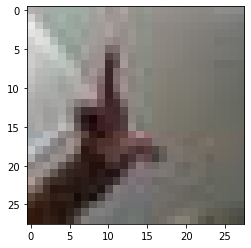

라벨: 0, 예측결과: 0


In [144]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

import matplotlib.pyplot as plt

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()
print("라벨: " + str(y_test[idx]) + ", 예측결과: " + str(predicted_labels[idx]))


### 6-2.잘못 추론한 데이터 톺아보기 See incorrectly inferred data

예측확률분포: [1.9611792e-01 8.1039725e-05 8.0380100e-01]
예측결과: 2, 라벨: 0


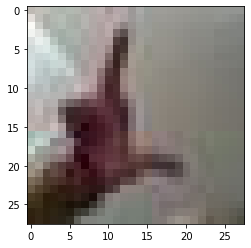

예측확률분포: [4.4452162e-15 4.3511132e-04 9.9956483e-01]
예측결과: 2, 라벨: 1


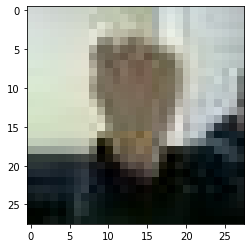

In [145]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=2)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("예측결과: " + str(predicted_labels[n]) + ", 라벨: " + str(y_test[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 7.더 좋은 성능을 위해 hyperparameter 변경 Change hyperparameter
#### 7-1.overfitting 되었는지 확인해보기 위해  To make sure it's overfitting,
Conv2D layer에서 입력 이미지 특징 개수를 줄이고  
Reduce the number of input image features in the Conv2D layer,  
Dense layer에서 뉴런 개수를 줄이고  
reduce the number of neurons in the Dense layer,  
epoch를 줄여서 전체 데이터 훈련 횟수를 줄이고  
reduce the number of total data training in epoch,  
batch_size를 줄여 batch마다 데이터 샘플의 size을 줄였습니다.  
and reduce the number of data sample's size per batch.

In [148]:
# 바꿔 볼 수 있는 하이퍼파라미터들
# changable hyperparameter
# original n_channel_1=30
# original n_channel_2=60
# original n_dense=60
# original n_train_epoch=15
# original batch_size=20

n_channel_1=15
n_channel_2=30
n_dense=30
n_train_epoch=7
n_batch_size=1

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=n_train_epoch, batch_size=n_batch_size)

def load_data_for_test(img_path):
   
    number_of_data=900   
    img_size=28
    color=3

    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=1  
        idx=idx+1       

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=2   
        idx=idx+1

    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data_for_test(test_image_dir_path)
x_test_norm = x_test/255.0 

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 26, 26, 15)        420       
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 11, 11, 30)        4080      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 5, 5, 30)          0         
_________________________________________________________________
flatten_47 (Flatten)         (None, 750)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 30)                22530     
_________________________________________________________________
dense_95 (Dense)             (None, 3)               

#### 7-1.underfitting 되었는지 확인해보기 위해  To make sure it's underfitting,
위와 반대로 모두 늘여서 test했습니다.  
I tested it by stretching it out as opposed to the above.

In [149]:
#바꿔 볼 수 있는 하이퍼파라미터들
# changable hyperparameter
# original n_channel_1=30
# original n_channel_2=60
# original n_dense=60
# original n_train_epoch=15
# original batch_size=20

n_channel_1=60
n_channel_2=120
n_dense=120
n_train_epoch=20
n_batch_size=40

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=n_train_epoch, batch_size=n_batch_size)

def load_data_for_test(img_path):
   
    number_of_data=900   
    img_size=28
    color=3
  
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0 
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=1   
        idx=idx+1       

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2  
        idx=idx+1

    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data_for_test(test_image_dir_path)
x_test_norm = x_test/255.0   

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 26, 26, 60)        1680      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 13, 13, 60)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 11, 11, 120)       64920     
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 5, 5, 120)         0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 3000)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 120)               360120    
_________________________________________________________________
dense_97 (Dense)             (None, 3)               

### 8.고찰 Consideration
최대한 많은 data를 모은 덕분에 첫 test에 비교적 안정적인 결과 나왔다고 생각한다.  
I think the results were relatively stable in the first test because I collected as much data as possible.  
이후 overfitting과 underfitting을 확인해 보았지만 첫 테스트의 정확도가 더 높았다.  
Then I checked overfitting and underfitting, but the first test was more accurate.  
왜 첫 test의 정확도가 제일 높았는지 생각해보자.  
Let's think about why the accuracy of the first test was the highest.
- 작은 픽셀 이미지에 맞는 Conv2D와 Dense를 MNIST를 참고해서 적절하게 구했다. 
- Conv2D and Dense for small pixel images were appropriately obtained by referring to MNIST.
- train data와 test data의 비율을 Exploration 2를 참고해 8:2의 비율로 진행했다.  
- The ratio of train data and test data was carried out at a ratio of 8:2 with reference to Exploration 2.  
이렇게 2가지를 꼽을 수 있겠다.  
I can pick these two.  
  
다음 학습에는 본래 코드를 더 이해하면서 응용할 수 있도록 노력해야겠다.  
In the next learning, I should try to apply the original code with a better understanding.